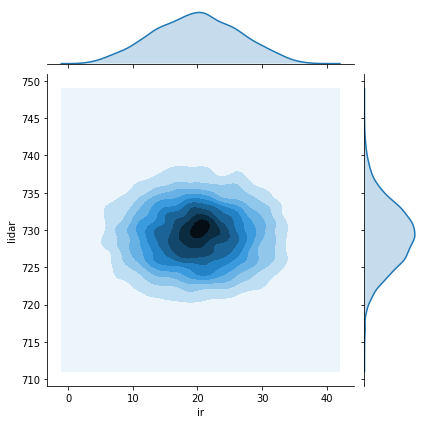

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("sensor_data_700.txt",delimiter=" ",header=None,names =("data","time","ir","lidar"))

d = data[(data["time"]<160000) & (data["time"]>=120000)] #12時から16時までのデータだけを抽出
d = d.loc[:,["ir","lidar"]]

sns.jointplot(d["ir"],d["lidar"],d,kind="kde")
plt.show()

In [4]:
print("光センサの計測値の分散：",d.ir.var())
print("Lidarの計測値の分散：",d.lidar.var())

diff_ir = d.ir - d.ir.mean()
diff_liadr = d.lidar - d.lidar.mean()
a = diff_ir * diff_liadr

print("共分散：",sum(a)/(len(d)-1))

d.mean()

光センサの計測値の分散： 42.117126367699505
Lidarの計測値の分散： 17.702026469211596
共分散： -0.31677803385436953


ir        19.860247
lidar    729.311958
dtype: float64

In [5]:
#上の計算を簡単に求める
d.cov()

,ir,lidar
ir,42.117126,-0.316778
lidar,-0.316778,17.702026


In [6]:
from scipy.stats import multivariate_normal

irlidar = multivariate_normal(mean=d.mean().values.T,cov=d.cov().values)

d.mean().values.T → μ

d.cov().values → Σ

に相当する

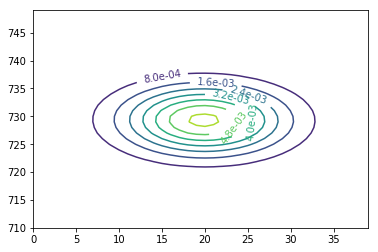

In [7]:
import numpy as np

x,y = np.mgrid[0:40,710:750] #2次元平面に均等にX座標、Y座標を作る
pos = np.empty(x.shape + (2,)) #xは40*40の2次元リストで、これに3次元目を加えて40*40*2のリストを作成
# posは40*40の2階建て。1階はX、2階はY

pos[:,:,0] = x #加えた3次元目にx,yを代入
pos[:,:,1] = y
cont = plt.contour(x,y,irlidar.pdf(pos)) #x,y座標とそれに対応する密度を算出
cont.clabel(fmt='%1.1e') #等高線に値を書き込むためのフォーマットを作成

plt.show()

In [8]:
print("X座標",x)

print("Y座標",y)

#同じ位置にあるx,yを組み合わせると、X座標、Y座標になる

X座標 [[ 0  0  0 ...  0  0  0]
 [ 1  1  1 ...  1  1  1]
 [ 2  2  2 ...  2  2  2]
 ...
 [37 37 37 ... 37 37 37]
 [38 38 38 ... 38 38 38]
 [39 39 39 ... 39 39 39]]
Y座標 [[710 711 712 ... 747 748 749]
 [710 711 712 ... 747 748 749]
 [710 711 712 ... 747 748 749]
 ...
 [710 711 712 ... 747 748 749]
 [710 711 712 ... 747 748 749]
 [710 711 712 ... 747 748 749]]


In [9]:
print(x[1])
print(y[2])
print(len(x[1]))
print(len(y[2]))
print(len(x))
print(len(y))
print(pos[10,1,0])
print(pos[2,39,1])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
[710 711 712 713 714 715 716 717 718 719 720 721 722 723 724 725 726 727
 728 729 730 731 732 733 734 735 736 737 738 739 740 741 742 743 744 745
 746 747 748 749]
40
40
40
40
10.0
749.0


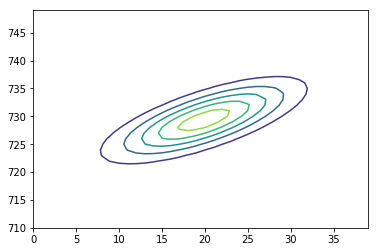

In [11]:
c = d.cov().values + np.array([[0,20],[20,0]])
tmp = multivariate_normal(mean = d.mean().values.T, cov = c)
cont = plt.contour(x,y,tmp.pdf(pos))
plt.show()

# 共分散 σxy に、20を足す（共分散行列に([0,20],[20,0])の行列を足している）

# 次のノートで、実データで肩が上がったデータを出す